# Data and packages

In [1]:
import squidpy as sq
import numpy as np
import pandas as pd
import numba.types as nt

import matplotlib.pyplot as plt

# pip install git+https://github.com/h2oai/datatable.git
import datatable

import os
import csv

In [2]:
os.getcwd()

'/Users/rafaeldossantospeixoto/Library/CloudStorage/OneDrive-JohnsHopkins/jefworks/crawdad/repos/crawdad_revision_analysis/running_code/squidpy'

In [3]:
meta = datatable.fread("exported_data/spleen/pkhl.csv")
meta = meta.to_pandas().set_index('C0')
meta.head()

,x,y,celltypes
C0,,,
1,0.000000,-12.076923,Sinusoidal cells
2,0.000000,-29.437500,Myeloid cells
3,4.906250,-1.509615,Myeloid cells
4,2.641827,-21.889423,Sinusoidal cells
5,0.000000,-48.685096,Neutrophils/Monocytes


In [4]:
meta.shape

(154446, 3)

# Squidpy

In [5]:
# just some random data for gene expression because I'm just interested in getting the coordinates and labels in there
from anndata import AnnData
from numpy.random import default_rng
rng = default_rng(42)

counts = rng.integers(0, 15, size=(meta.shape[0], 50))
counts.shape

(154446, 50)

In [6]:
adata = AnnData(counts, obsm={"spatial": np.array(meta[["x", "y"]], dtype=float)})

In [7]:
adata.obs = meta

/Users/rafaeldossantospeixoto/anaconda3/envs/squidpy/lib/python3.8/site-packages/anndata/_core/anndata.py:782: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1, 2, 3, 4, 5]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [8]:
adata.obs

,x,y,celltypes
C0,,,
1,0.000000,-12.076923,Sinusoidal cells
2,0.000000,-29.437500,Myeloid cells
3,4.906250,-1.509615,Myeloid cells
4,2.641827,-21.889423,Sinusoidal cells
5,0.000000,-48.685096,Neutrophils/Monocytes
...,...,...,...
154442,3547.218750,-3416.259616,Neutrophils/Monocytes
154443,3541.935097,-3298.509616,Sinusoidal cells
154444,3550.237981,-3291.716347,Neutrophils/Monocytes


/Users/rafaeldossantospeixoto/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


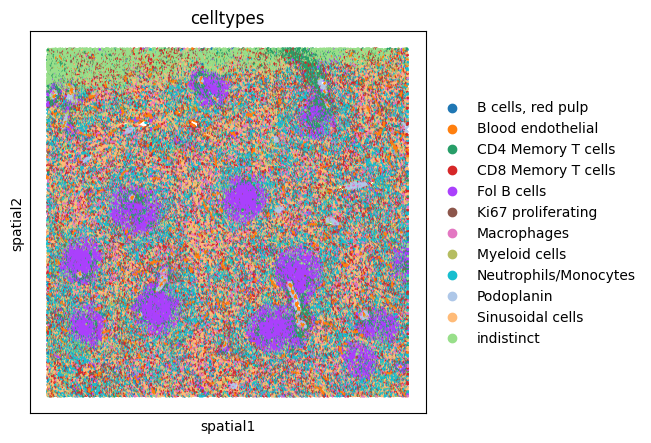

In [9]:
sq.pl.spatial_scatter(
        adata,
        shape = None,
        color = "celltypes",
        size=3
)

In [10]:
## change scale to 1750
sq.gr.co_occurrence(adata, cluster_key = "celltypes", interval=np.linspace(1, 1750, num=75),
                    n_jobs = 7)


/Users/rafaeldossantospeixoto/anaconda3/envs/squidpy/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/2926 [00:00<?, ?/s]

100%|██████████| 2926/2926 [03:14<00:00, 15.03/s]


In [11]:
adata

AnnData object with n_obs × n_vars = 154446 × 50
    obs: 'x', 'y', 'celltypes'
    uns: 'celltypes_colors', 'celltypes_co_occurrence'
    obsm: 'spatial'

In [12]:
## get the co-occurance values
occ = adata.uns["celltypes_co_occurrence"]["occ"]
occ.shape

(12, 12, 74)

In [13]:
adata.uns["celltypes_co_occurrence"]

{'occ': array([[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],
 
        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],
 
        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],
 
        ...,
 
        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
       

In [14]:
## get the intervals
intervals = adata.uns["celltypes_co_occurrence"]["interval"]
intervals.shape

(75,)

KeyError: 'y'

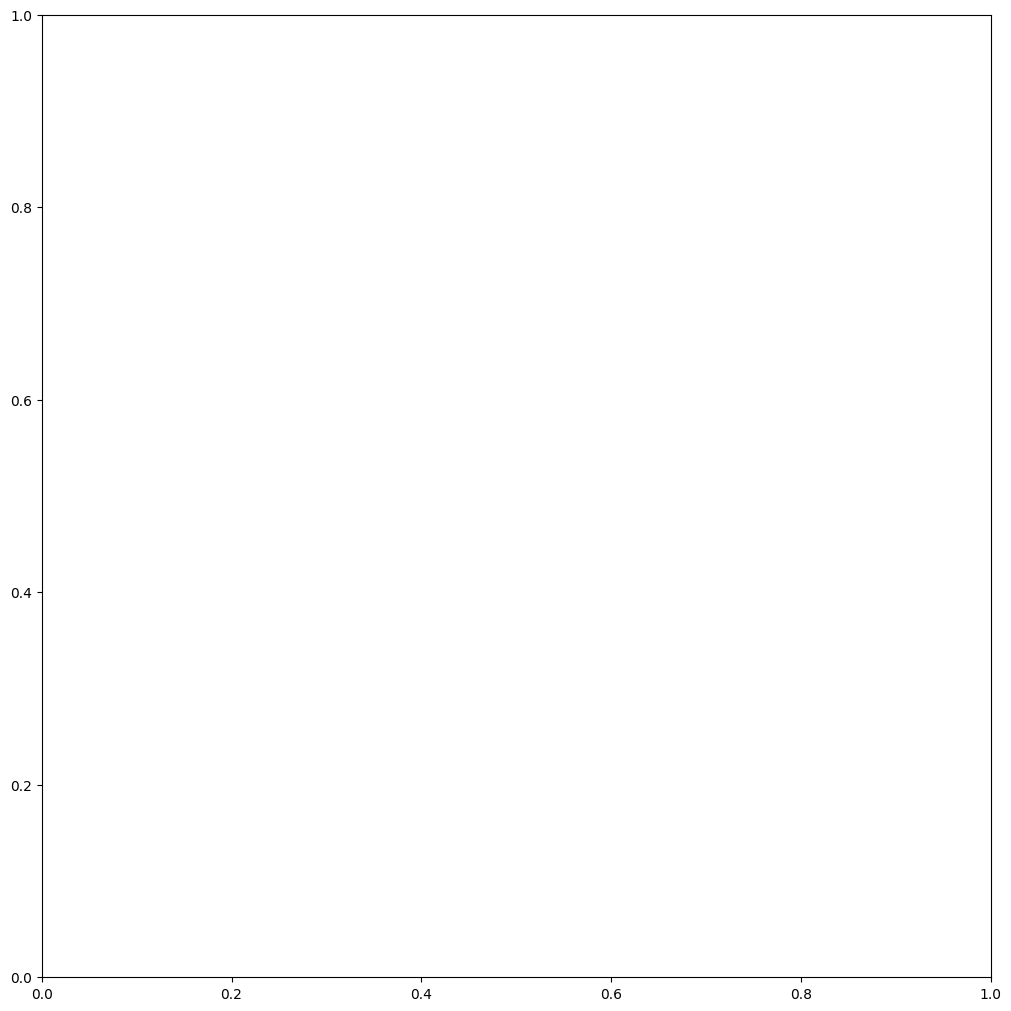

In [15]:
for ct in np.unique(adata.obs["celltypes"]):
    sq.pl.co_occurrence(adata, cluster_key="celltypes", clusters=ct,
                        save="simulation_co_occurance.{}.pdf".format(ct),
                        figsize=(10,10))

# Extract data

In [16]:
out = adata.uns["celltypes_co_occurrence"]["occ"]
interval = adata.uns["celltypes_co_occurrence"]["interval"][1:]
categories = adata.obs["celltypes"].cat.categories

In [17]:
print(type(out), type(interval), type(categories))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'pandas.core.indexes.base.Index'>


In [19]:
categories

Index(['B cells, red pulp', 'Blood endothelial', 'CD4 Memory T cells',
       'CD8 Memory T cells', 'Fol B cells', 'Ki67 proliferating',
       'Macrophages', 'Myeloid cells', 'Neutrophils/Monocytes', 'Podoplanin',
       'Sinusoidal cells', 'indistinct'],
      dtype='object')

## Create DF

In [20]:
cluster_key = "celltypes"

In [21]:
clusters = categories

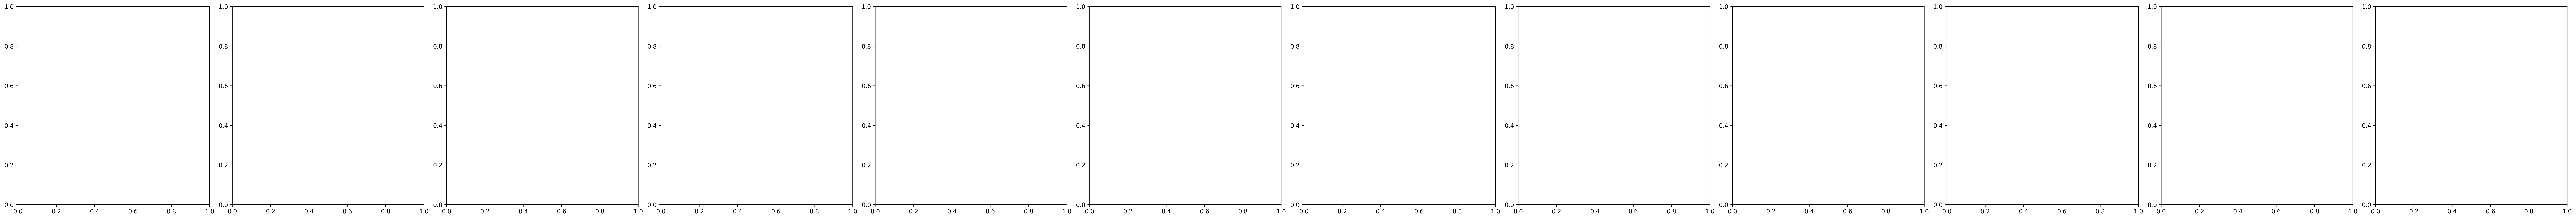

In [22]:
fig, axs = plt.subplots(
        1,
        len(clusters),
        figsize=(5 * len(clusters), 5),
        dpi=300,
        constrained_layout=True,
    )
axs = np.ravel(axs)

In [23]:
df_dict = {}

for g, ax in zip(clusters, axs):
        print(g)
        idx = np.where(categories == g)[0][0]
        df = pd.DataFrame(out[idx, :, :].T, columns=categories).melt(var_name=cluster_key, value_name="probability")
        df["distance"] = np.tile(interval, len(categories))
        ## is g the reference or the neighbor? the way they plot, looks like the ref since it is one loop for plot
        df["reference"] = g
        df_dict[g] = df


B cells, red pulp
Blood endothelial
CD4 Memory T cells
CD8 Memory T cells
Fol B cells
Ki67 proliferating
Macrophages
Myeloid cells
Neutrophils/Monocytes
Podoplanin
Sinusoidal cells
indistinct


In [24]:
result_df = pd.concat(df_dict.values(), axis=0, keys=df_dict.keys(), ignore_index=True)
result_df.head()

,celltypes,probability,distance,reference
0,"B cells, red pulp",NaN,24.635136,"B cells, red pulp"
1,"B cells, red pulp",NaN,48.270271,"B cells, red pulp"
2,"B cells, red pulp",NaN,71.905403,"B cells, red pulp"
3,"B cells, red pulp",NaN,95.540543,"B cells, red pulp"
4,"B cells, red pulp",NaN,119.175674,"B cells, red pulp"


In [25]:
# > names(dat_50)
# [1] "perm"      "neighbor"  "Z"         "scale"     "reference" "id" 
# result_df.columns = ["neighbor", "Z", "scale", "reference"]
result_df.columns = ["neighbor", "probability", "distance", "reference"]

In [26]:
result_df["id"] = 0
result_df["perm"] = 1
result_df.head()

,neighbor,probability,distance,reference,id,perm
0,"B cells, red pulp",NaN,24.635136,"B cells, red pulp",0,1
1,"B cells, red pulp",NaN,48.270271,"B cells, red pulp",0,1
2,"B cells, red pulp",NaN,71.905403,"B cells, red pulp",0,1
3,"B cells, red pulp",NaN,95.540543,"B cells, red pulp",0,1
4,"B cells, red pulp",NaN,119.175674,"B cells, red pulp",0,1


In [27]:
result_df.to_csv('results_data/spleen/dat_pkhl_squidpy.csv')